In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Units: s/byte
T_copy = 1/(11664.6*1024*1024)

# Function that takes the number of points as argument and returns the time it takes to send AND recv that many
T_MPI_sendrecv = lambda x: max(0.02,0.000001768088*x+0.033992)/1000

In [16]:
# L, R, T, B
halo = [1,1,1,1]

In [50]:
T_1 = np.array([])
T_10 = np.array([])
T_100 = np.array([])
T_1000 = np.array([])
for i in range(100,10000,100):
    num_halo = 8*( (halo[0]+halo[1])*i + (halo[2]+halo[3])*(i-(halo[0]+halo[1])) )
    T_1 = np.append(T_1, [(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_10 = np.append(T_10, [10*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_100 = np.append(T_100, [100*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_1000 = np.append(T_1000, [1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    
# THIS IS WRONG!!!
T_10 /= 2.5
T_100 /= 2.5
T_1000 /= 2.5

In [51]:
x_exp = np.array([100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000])
T_exp_1 = np.array([0.13, 0.16, 0.25, 0.28, 0.30, 0.37, 0.41, 0.48, 0.63])/1000
T_exp_10 = np.array([0.34, 0.56, 0.77, 1, 1.18, 1.54, 1.81, 2.1, 2.8])/1000
T_exp_100 = np.array([1.35, 3.15, 5.7, 7.6, 9.65, 12.9, 15.6, 17.8, 24])/1000
T_exp_1000 = np.array([11, 27, 48, 67, 95, 130, 152, 180, 250])/1000


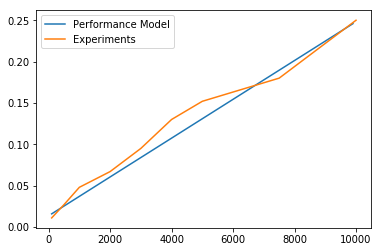

In [52]:
# Change T_1 and T_exp_1 to plot a different number of iterations
f = plt.figure()

line1, = plt.plot(range(100,10000,100),T_1000, label="Performance Model")
line2, = plt.plot(x_exp, T_exp_1000, label="Experiments")

plt.legend(handles=[line1, line2], loc=2)

plt.show()

f.savefig("performance.pdf", bbox_inches='tight')